# Probability II - random walks

## Where are we heading?
- We have introduced **stochastic** (random) models
- We have a stochastic model of recovery

- Goal: Model individual people(**agents**) moving in space &rarr; *complex adaptive system*
- When they are in **contact** they can transmit infection
- And they can recover

## Goals for today
- Random motion: Random walks
- Characterising variability

## Random Walks
- Watch a particle in water under microscope.
- Follows a random path: **Brownian motion**.
- Fundamental dynamical process in many domains:
    - Biology - protein inside cell
    - Chemistry - reactant in 
    - Physics - particle in fluid
    - Engineering - jet noise
    - Economics - stock price
    - Environmental sciences - pollutant spreading out
    - Mathematics - fundamental random process

## Modelling random motion: Random walk
It's expensive to simulate collisions of many partible, so instead, **directly simulate** random kicks using random numbers

Simplest model: **simple random walk**:
- 1 particle moving on integers in 1D
- Jumps leftor right, e.g. with equal probability
- Discrete space  and time

How can we generate jumps +/-1 with uniform probability?

In [1]:
jump() = rand( (-1, +1) )

jump (generic function with 1 method)

In [2]:
jump()

-1

Another solution: generate random Boolean (true/false) and convert:

In [12]:
r = rand(Bool)
Int(r)
# Need to convert 0 to -1

0

In [14]:
bernoulli(p) = rand() < p

bernoulli (generic function with 1 method)

In [57]:
bernoulli(0.5)

false

Random **walk**: *sequence* of random *jumps*!

In [58]:
[jump() for i in 1:10]

10-element Vector{Int64}:
  1
 -1
 -1
  1
  1
 -1
 -1
  1
 -1
 -1

In [59]:
function walk(n)
    x = 0
    
    for i in 1:n
        x += jump()                    
    end
    
    return x
end

walk (generic function with 1 method)

In [60]:
walk(10)

0

In [61]:
function trajectory(n)
    x = 0
    xₛ = [x]
    
    for i in 1:n
        x += jump()
        push!(xₛ,x)
    end
    
    return xₛ
end

trajectory (generic function with 1 method)

In [62]:
trajectory(10)

11-element Vector{Int64}:
  0
 -1
 -2
 -3
 -4
 -5
 -6
 -7
 -6
 -7
 -6

In [63]:
using Plots

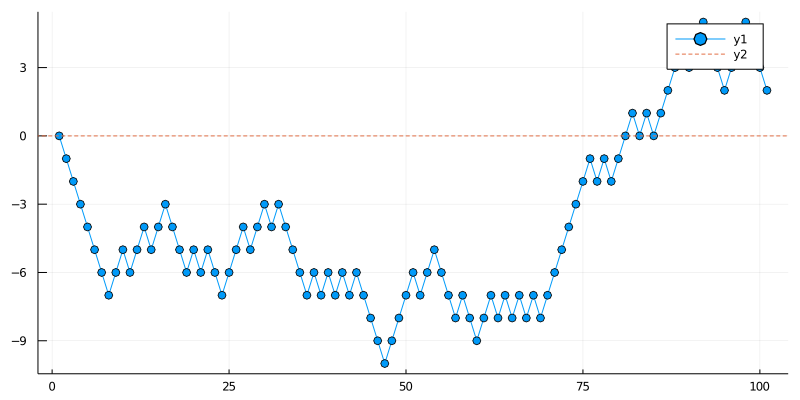

In [71]:
traj = trajectory(100);
plot(traj, m=:o, size=(800,400))
hline!([0], ls=:dash) # ! functions add to the existing plot

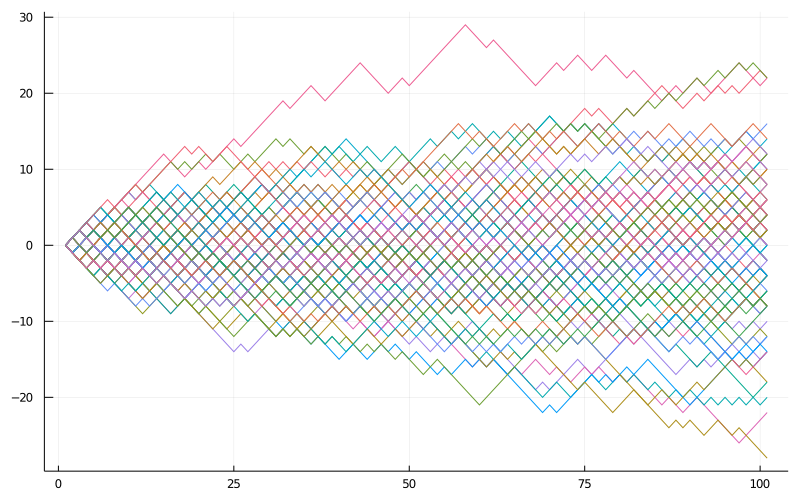

In [96]:
Nₜᵣₐⱼₛ = 100
Nₛₜₑₚₛ = 100

p = plot(size=(800,500), leg=false)

for i in 1:Nₜᵣₐⱼₛ
    traj = trajectory(Nₛₜₑₚₛ)
    
    plot!(traj)
end

p

## Random walkers &rarr; time-wise update

### Precompute the data

In [ ]:
using Interact

In [107]:
n = 20
traj = trajectory(n)

@manipulate for i in slider(1:n,value=1)
    plot(traj[1:i],m=:o)
    xlims!(0,length(traj))
    ylims!(minimum(traj)-1,maximum(traj)+1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 20, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f55ddf02620, Task (runnable) @0x00007f55ddf02620), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10995836373683524669\",\"id\":\"8503703208578864816\",\"type\":\"observable\"}),\

### Run N walkers simultaneously

In [108]:
n = 20

traj = [trajectory(n)]

1-element Vector{Vector{Int64}}:
 [0, -1, -2, -3, -2, -1, -2, -1, -2, -3  …  -3, -2, -1, 0, 1, 2, 1, 0, -1, -2]

In [109]:
push!(traj,trajectory(n))

2-element Vector{Vector{Int64}}:
 [0, -1, -2, -3, -2, -1, -2, -1, -2, -3  …  -3, -2, -1, 0, 1, 2, 1, 0, -1, -2]
 [0, 1, 0, -1, 0, -1, -2, -3, -4, -3  …  -3, -2, -3, -4, -5, -6, -5, -4, -5, -6]

In [110]:
traj[2]

21-element Vector{Int64}:
  0
  1
  0
 -1
  0
 -1
 -2
 -3
 -4
 -3
 -4
 -3
 -2
 -3
 -4
 -5
 -6
 -5
 -4
 -5
 -6

In [111]:
walkers = [trajectory(n) for i in 1:10]

10-element Vector{Vector{Int64}}:
 [0, -1, 0, 1, 2, 1, 0, 1, 2, 1  …  -1, -2, -1, -2, -1, 0, -1, 0, -1, -2]
 [0, -1, 0, -1, 0, -1, 0, -1, -2, -1  …  -1, 0, -1, -2, -1, -2, -3, -2, -1, 0]
 [0, -1, -2, -1, -2, -3, -2, -3, -4, -3  …  -3, -4, -3, -2, -1, 0, -1, -2, -3, -2]
 [0, -1, -2, -3, -4, -5, -4, -5, -6, -7  …  -9, -8, -9, -10, -11, -10, -9, -8, -9, -10]
 [0, 1, 0, 1, 0, 1, 2, 1, 2, 3  …  3, 2, 3, 4, 3, 4, 3, 2, 1, 2]
 [0, 1, 2, 3, 2, 3, 4, 5, 4, 5  …  7, 6, 5, 6, 5, 4, 5, 6, 5, 4]
 [0, 1, 0, 1, 2, 3, 4, 3, 2, 1  …  1, 0, -1, -2, -1, 0, -1, -2, -1, -2]
 [0, -1, 0, 1, 0, -1, 0, -1, 0, 1  …  1, 0, 1, 0, -1, 0, 1, 2, 3, 2]
 [0, 1, 2, 1, 2, 1, 0, -1, -2, -1  …  -1, 0, -1, -2, -3, -2, -1, -2, -1, 0]
 [0, 1, 2, 3, 2, 1, 2, 3, 2, 1  …  1, 2, 3, 4, 5, 6, 5, 4, 5, 6]

In [112]:
i = 10

[ traj[i] for traj in walkers ]

10-element Vector{Int64}:
  1
 -1
 -3
 -7
  3
  5
  1
  1
 -1
  1

Convert Vector of Vectors into a matrix:

In [114]:
hcat(walkers[1],walkers[2]) # horizontal concatenation

21×2 Matrix{Int64}:
  0   0
 -1  -1
  0   0
  1  -1
  2   0
  1  -1
  0   0
  1  -1
  2  -2
  1  -1
  0   0
 -1  -1
 -2   0
 -1  -1
 -2  -2
 -1  -1
  0  -2
 -1  -3
  0  -2
 -1  -1
 -2   0

In [116]:
hcat(walkers...) # "..." -> splat: concatenates all 

21×10 Matrix{Int64}:
  0   0   0    0  0  0   0   0   0  0
 -1  -1  -1   -1  1  1   1  -1   1  1
  0   0  -2   -2  0  2   0   0   2  2
  1  -1  -1   -3  1  3   1   1   1  3
  2   0  -2   -4  0  2   2   0   2  2
  1  -1  -3   -5  1  3   3  -1   1  1
  0   0  -2   -4  2  4   4   0   0  2
  1  -1  -3   -5  1  5   3  -1  -1  3
  2  -2  -4   -6  2  4   2   0  -2  2
  1  -1  -3   -7  3  5   1   1  -1  1
  0   0  -2   -8  2  6   2   2   0  2
 -1  -1  -3   -9  3  7   1   1  -1  1
 -2   0  -4   -8  2  6   0   0   0  2
 -1  -1  -3   -9  3  5  -1   1  -1  3
 -2  -2  -2  -10  4  6  -2   0  -2  4
 -1  -1  -1  -11  3  5  -1  -1  -3  5
  0  -2   0  -10  4  4   0   0  -2  6
 -1  -3  -1   -9  3  5  -1   1  -1  5
  0  -2  -2   -8  2  6  -2   2  -2  4
 -1  -1  -3   -9  1  5  -1   3  -1  5
 -2   0  -2  -10  2  4  -2   2   0  6

In [118]:
walkers_matrix = reduce(hcat, walkers) # more efficient when have a lot of vectors

21×10 Matrix{Int64}:
  0   0   0    0  0  0   0   0   0  0
 -1  -1  -1   -1  1  1   1  -1   1  1
  0   0  -2   -2  0  2   0   0   2  2
  1  -1  -1   -3  1  3   1   1   1  3
  2   0  -2   -4  0  2   2   0   2  2
  1  -1  -3   -5  1  3   3  -1   1  1
  0   0  -2   -4  2  4   4   0   0  2
  1  -1  -3   -5  1  5   3  -1  -1  3
  2  -2  -4   -6  2  4   2   0  -2  2
  1  -1  -3   -7  3  5   1   1  -1  1
  0   0  -2   -8  2  6   2   2   0  2
 -1  -1  -3   -9  3  7   1   1  -1  1
 -2   0  -4   -8  2  6   0   0   0  2
 -1  -1  -3   -9  3  5  -1   1  -1  3
 -2  -2  -2  -10  4  6  -2   0  -2  4
 -1  -1  -1  -11  3  5  -1  -1  -3  5
  0  -2   0  -10  4  4   0   0  -2  6
 -1  -3  -1   -9  3  5  -1   1  -1  5
  0  -2  -2   -8  2  6  -2   2  -2  4
 -1  -1  -3   -9  1  5  -1   3  -1  5
 -2   0  -2  -10  2  4  -2   2   0  6

In [123]:
walkers_matrix[1:end,end]

21-element Vector{Int64}:
 0
 1
 2
 3
 2
 1
 2
 3
 2
 1
 2
 1
 2
 3
 4
 5
 6
 5
 4
 5
 6

In [136]:
n = 100
walkers = [trajectory(n) for i in 1:10000]
final_positions = [traj[end] for traj in walkers];

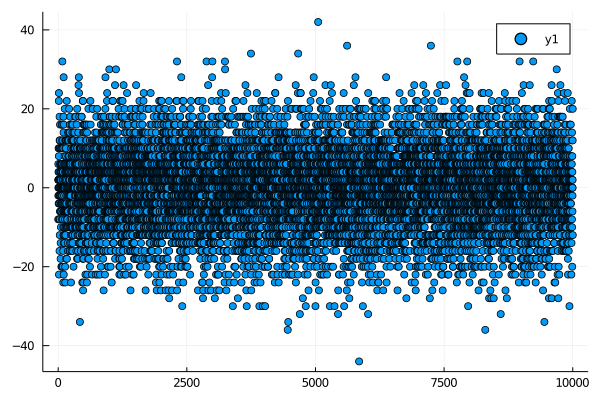

In [137]:
scatter(final_positions)

In [138]:
# ]add StatsBase

In [139]:
using StatsBase

In [140]:
countmap(final_positions)

Dict{Int64, Int64} with 39 entries:
  -12 => 390
  16  => 217
  20  => 115
  -20 => 129
  12  => 408
  24  => 34
  -6  => 634
  8   => 564
  28  => 10
  30  => 4
  0   => 779
  22  => 65
  6   => 635
  32  => 9
  36  => 2
  -2  => 792
  14  => 269
  -34 => 3
  -30 => 14
  -16 => 226
  -8  => 524
  -32 => 4
  -24 => 47
  -18 => 140
  34  => 2
  ⋮   => ⋮

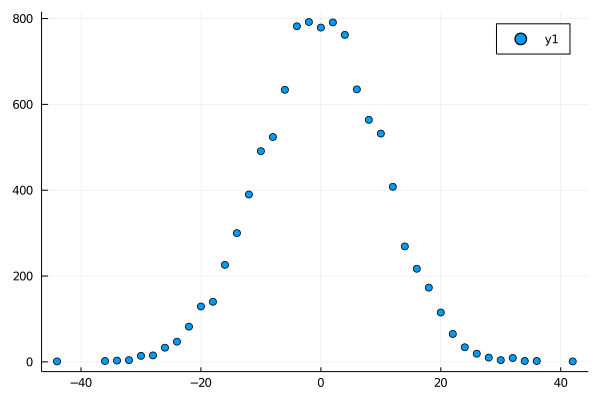

In [141]:
scatter(countmap(final_positions))

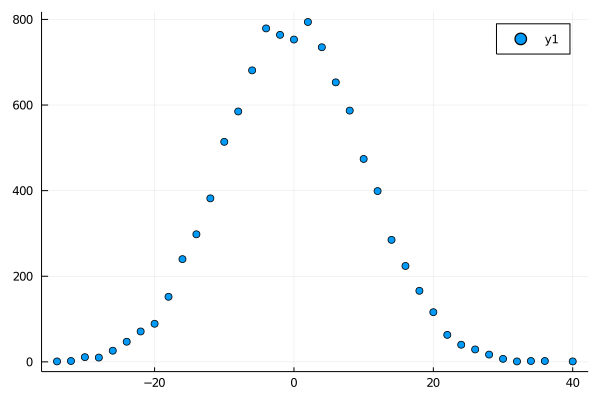

In [147]:
n = 100
num_walkers = 10_000

walkers = [ trajectory(n) for i in 1:num_walkers ] 

final_positions = [ traj[end] for traj in walkers ]

counts = countmap(final_positions)

scatter(counts)

In [178]:
n = 100
num_walkers = 10

walkers = [ trajectory(n) for i in 1:num_walkers ]
walkers_matrix = reduce(hcat,walkers)

@manipulate for i in slider(1:n,value=1)
    plot(walkers_matrix[1:i,:],m=:o,size=(800,500),leg=false)
    xlims!(0,n)
    ylims!(minimum(walkers_matrix)-1,maximum(walkers_matrix)+1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f55df0d8550, Task (runnable) @0x00007f55df0d8550), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",

20

In [161]:
i_positions

10-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0